In [1]:
import geopandas as gpd
from shapely import wkt
import folium
import pandas as pd

inequality = gpd.read_file('data/M19_01_Monterrey.shp')

inequality = inequality.to_crs(epsg=4326)
inegi = pd.read_excel('data/poblacion_suelo.xlsx')


inegi["geometry"] = inegi["geometry"].apply(wkt.loads)
inegi = gpd.GeoDataFrame(inegi, geometry="geometry", crs="EPSG:4326")


In [181]:
inegi["geometry"]

0       POLYGON ((-100.34877 25.75497, -100.34889 25.7...
1       POLYGON ((-100.40637 25.76005, -100.40642 25.7...
2       POLYGON ((-100.35263 25.7418, -100.35405 25.74...
3       POLYGON ((-100.40797 25.75579, -100.40803 25.7...
4       POLYGON ((-100.41435 25.75627, -100.4152 25.75...
                              ...                        
5047    POLYGON ((-100.33205 25.73048, -100.33221 25.7...
5048    POLYGON ((-100.34637 25.73838, -100.34664 25.7...
5049    POLYGON ((-100.33588 25.72225, -100.33595 25.7...
5050    POLYGON ((-100.35245 25.7321, -100.35307 25.73...
5051    POLYGON ((-100.34829 25.73128, -100.34845 25.7...
Name: geometry, Length: 5052, dtype: geometry

In [168]:
inegi.geometry

0       POLYGON ((-100.34877 25.75497, -100.34889 25.7...
1       POLYGON ((-100.40637 25.76005, -100.40642 25.7...
2       POLYGON ((-100.35263 25.7418, -100.35405 25.74...
3       POLYGON ((-100.40797 25.75579, -100.40803 25.7...
4       POLYGON ((-100.41435 25.75627, -100.4152 25.75...
                              ...                        
5047    POLYGON ((-100.33205 25.73048, -100.33221 25.7...
5048    POLYGON ((-100.34637 25.73838, -100.34664 25.7...
5049    POLYGON ((-100.33588 25.72225, -100.33595 25.7...
5050    POLYGON ((-100.35245 25.7321, -100.35307 25.73...
5051    POLYGON ((-100.34829 25.73128, -100.34845 25.7...
Name: geometry, Length: 5052, dtype: geometry

In [2]:
import geopandas as gpd
from shapely import wkt
import folium
import pandas as pd

inequality = gpd.read_file('data/M19_01_Monterrey.shp')

inequality = inequality.to_crs(epsg=4326)
inegi = pd.read_excel('data/datos_monterrey.xlsx')


inegi["geometry"] = inegi["geometry"].apply(wkt.loads)
inegi = gpd.GeoDataFrame(inegi, geometry="geometry", crs="EPSG:4326")


In [183]:
inegi.geometry

0        POINT (-100.35704 25.70789)
1        POINT (-100.37062 25.71684)
2        POINT (-100.36267 25.71706)
3        POINT (-100.36667 25.71032)
4        POINT (-100.33978 25.71033)
                    ...             
22645    POINT (-100.33591 25.81216)
22646    POINT (-100.32286 25.78498)
22647     POINT (-100.3243 25.78871)
22648    POINT (-100.33356 25.78972)
22649    POINT (-100.27049 25.80764)
Name: geometry, Length: 22650, dtype: geometry

C:\Users\Vivi\AppData\Local\Temp\ipykernel_10832\3848691444.py:6: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


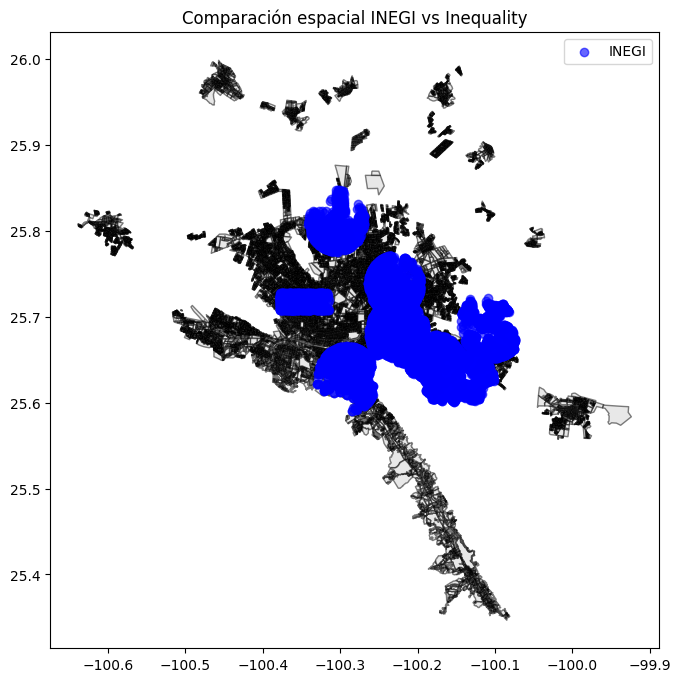

In [184]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
inequality.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5, label="Inequality")
inegi.plot(ax=ax, color="blue", alpha=0.6, label="INEGI")
plt.legend()
plt.title("Comparación espacial INEGI vs Inequality")
plt.show()


In [3]:
merged = gpd.sjoin(inegi, inequality, how="left", predicate="intersects")
merged.dropna()

,GUARNICI_C,CICLOCAR_C,GRAPROES,lon,VPH_PIDT,VPH_C_EL,TVIPAHAB,PUESAMBU_C,RECUCALL_C,VPH_DREN,...,Empleo,E_basica,E_media,E_superior,Salud_cama,Salud_cons,Abasto,Espacio_ab,Cultura,Est_Tpte
0,3,3,9.18,-100.357036,4,4,4,3,1,4,...,16662.0,1.0,7.0,0.0,613.0,131.0,79.0,0.0,0.0,0.0
1,7,7,10.40,-100.370617,43,43,43,7,7,43,...,11683.0,7.0,0.0,0.0,146.0,34.0,120.0,5845.0,0.0,0.0
2,1,3,8.78,-100.362675,78,79,79,3,1,79,...,19065.0,3.0,7.0,0.0,831.0,227.0,83.0,0.0,0.0,1.0
3,1,3,10.91,-100.366672,16,16,16,3,1,16,...,12831.0,4.0,7.0,0.0,146.0,34.0,71.0,0.0,0.0,0.0
4,1,3,12.17,-100.339781,34,35,35,3,1,35,...,47843.0,1.0,7.0,1.0,807.0,245.0,84.0,896.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,2,3,0.00,-100.335906,0,0,0,3,1,0,...,2002.0,0.0,0.0,0.0,0.0,14.0,46.0,11073.0,0.0,0.0
22646,2,3,11.56,-100.322856,31,31,31,3,1,31,...,4070.0,12.0,0.0,0.0,0.0,5.0,131.0,9092.0,0.0,0.0
22647,1,3,8.82,-100.324303,27,27,32,3,1,27,...,4752.0,9.0,1.0,0.0,0.0,3.0,116.0,8067.0,0.0,0.0
22648,1,3,10.13,-100.333557,32,32,32,3,1,32,...,2333.0,19.0,1.0,0.0,0.0,3.0,164.0,44683.0,0.0,0.0


### Use example

In [18]:
from shapely.geometry import box

# Definir límites de la zona
lat_min, lat_max = 25.60, 25.75
lon_min, lon_max = -100.37, -100.28

# Crear un polígono rectangular que representa el área de interés
zona_bbox = box(lon_min, lat_min, lon_max, lat_max)

# Filtrar los polígonos cuyo centroide cae dentro del rectángulo
zona_filtrada = merged[merged['geometry'].centroid.within(zona_bbox)].copy()

print(f"Zonas filtradas: {len(zona_filtrada)}")
print(zona_filtrada.geometry.iloc[0])  # sigue siendo el polígono original


Zonas filtradas: 3259
POINT (-100.35703574165434 25.707888487038947)


C:\Users\Vivi\AppData\Local\Temp\ipykernel_26116\2448342220.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zona_filtrada = merged[merged['geometry'].centroid.within(zona_bbox)].copy()


In [196]:
zona_filtrada.geometry

1334    POINT (-100.30674 25.65578)
1374    POINT (-100.31506 25.65118)
1376    POINT (-100.31791 25.65495)
1380    POINT (-100.30911 25.65898)
1408    POINT (-100.31165 25.65157)
                   ...             
4557    POINT (-100.31142 25.65755)
4558    POINT (-100.30902 25.65436)
4601    POINT (-100.30887 25.65521)
4609    POINT (-100.31895 25.65411)
4610      POINT (-100.301 25.65255)
Name: geometry, Length: 275, dtype: geometry

In [19]:


cols_principales = [
    "CICLOVIA_C", "CICLOCAR_C", "RECUCALL_C", "BANQUETA_C",
    "GUARNICI_C", "LETRERO_C", "ACESOAUT_C", "PUESAMBU_C",
    "ACESOPER_C", "PUESSEMI_C",
    "POBTOT", "VPH_C_EL", "VPH_DREN", "VPH_EXSA", "TVIPAHAB",
    "VPH_PIDT", "POBMAS", "POBFEM", "VIVPAR", "VIVTOT",
    "Salud_cons", "Abasto", "Empleo", "E_basica", "E_superior",
    "E_media", "Salud_cama", "Est_Tpte", "GRAPROES", "GRAPROES_F",
    "Salud_cama", "Salud_cons", "GRAPROES_M", "GRAPROES", "GRAPROES_F",
    "Empleo", "Est_Tpte", "E_basica", "Abasto", "E_media",
]


In [20]:
from GAPlanner import Park_School_Planner

planner = Park_School_Planner(
    df=zona_filtrada, 
    cols_principales=cols_principales,
    pop_size=50,      
    n_gen=50,        
    mut_rate=0.2,
    max_acciones=10,
    presupuesto_parques=5,
    presupuesto_escuelas=2
)


In [21]:
recomendaciones = planner.run()


In [22]:
insights = planner.get_insights()
insights

{'score_total': np.float64(4.782614256684985),
 'n_parques': np.int64(8),
 'n_escuelas': np.int64(2),
 'contrib_infra': np.float64(3.9241071428571423),
 'contrib_pobla': np.float64(0.09073794549266245),
 'contrib_serv': np.float64(3.16776916833518),
 'suelo_count': {'residential': 8, 'park': 1, 'no_class': 1}}

In [23]:
recomendaciones

[[<POINT (-100.364 25.718)>, 'Parque'],
 [<POINT (-100.363 25.725)>, 'Escuela'],
 [<POINT (-100.368 25.725)>, 'Parque'],
 [<POINT (-100.289 25.626)>, 'Parque'],
 [<POINT (-100.3 25.642)>, 'Parque'],
 [<POINT (-100.282 25.663)>, 'Parque'],
 [<POINT (-100.285 25.645)>, 'Parque'],
 [<POINT (-100.302 25.64)>, 'Parque'],
 [<POINT (-100.287 25.654)>, 'Parque'],
 [<POINT (-100.285 25.641)>, 'Escuela']]

In [24]:
import folium
from shapely.geometry import Point

lat, lon = merged['lat'].mean(), merged['lon'].mean()
m = folium.Map(location=[lat, lon], zoom_start=12)


for i, (geom_recom, accion) in enumerate(recomendaciones):
    if accion not in ["Parque", "Escuela"]:
        continue
    
    centroide = geom_recom.centroid
    
    for idx, poly in enumerate(inequality.geometry):
        if centroide.within(poly):
            color = "green" if accion == "Parque" else "blue"
            folium.GeoJson(
                poly.__geo_interface__,
                style_function=lambda feature, col=color: {
                    "fillColor": col,
                    "color": col,
                    "weight": 1,
                    "fillOpacity": 0.9
                }
            ).add_to(m)
            break  

m

m.save("mapa_acciones_coloreado.html")
